In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [23]:
DF = pd.read_csv(r'E:\Things I Did\pyclasses\bodyfat.csv')
DF.describe()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.601000,44.880000,177.451500,70.355000,37.894000,100.681000,91.867000,22.900000,32.292000,18.221000
std,8.006683,11.417937,29.508013,2.714807,2.302998,8.516493,10.261235,1.346451,3.065141,0.999322
min,3.700000,23.000000,127.500000,65.000000,32.800000,83.400000,70.400000,20.100000,25.600000,16.300000
25%,12.375000,39.750000,152.937500,68.250000,36.275000,94.000000,83.825000,22.000000,29.900000,17.600000
50%,18.950000,44.000000,176.125000,70.000000,37.900000,99.250000,90.150000,22.600000,32.000000,18.200000
75%,24.575000,52.000000,195.437500,72.250000,39.400000,105.600000,98.975000,23.725000,34.400000,18.825000
max,40.100000,74.000000,262.750000,77.750000,43.200000,128.300000,126.200000,27.000000,38.500000,21.400000


In [24]:
DF.head(10)

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.3,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,22.5,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,22.0,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,12.3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,20.5,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7
5,22.6,54,198.00,72.00,39.9,107.6,100.0,22.0,35.9,18.9
6,28.7,43,200.50,71.50,37.9,107.2,103.1,23.7,32.1,18.7
7,21.3,42,163.00,70.25,35.3,93.5,89.6,21.9,30.7,17.4
8,29.9,37,241.25,71.50,42.1,119.2,110.3,24.8,34.4,18.4
9,21.3,41,218.50,71.00,39.8,111.7,100.5,25.2,37.5,18.7


In [25]:
#Train
#Test
X = DF.iloc[:,1:]
Y = DF.iloc[:,0]

In [26]:
X

,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7
...,...,...,...,...,...,...,...,...,...
95,48,177.25,72.75,36.8,96.0,90.0,22.8,29.9,18.1
96,43,187.75,74.00,37.7,97.8,98.6,23.8,34.3,17.7
97,33,184.25,68.75,40.7,98.9,92.1,23.5,33.5,19.7
98,26,223.00,70.25,40.6,114.1,106.8,24.7,36.0,18.4


In [27]:
Y

0     32.3
1     22.5
2     22.0
3     12.3
4     20.5
      ... 
95    20.1
96    29.4
97    13.0
98    25.2
99     4.0
Name: Bodyfat, Length: 100, dtype: float64

In [28]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [29]:
print(Xtrain.shape)
scx = StandardScaler()
scy = StandardScaler()
Xtrain = scx.fit_transform(Xtrain)
print(Xtrain.shape)
Ytrain = np.array(Ytrain).reshape(-1,1)
Ytrain = scy.fit_transform(Ytrain)
print(Ytrain.shape)

(80, 9)
(80, 9)
(80, 1)


In [30]:
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(80, 9) (20, 9) (80, 1) (20,)


In [31]:
model = LinearRegression()
model.fit(Xtrain,Ytrain)
print('Done')

Done


In [32]:
Xtest = scx.transform(Xtest)
Ypred = model.predict(Xtest)
Ypred = scy.inverse_transform(Ypred)

In [33]:
print(Ypred,Ytest)

[[35.6097961 ]
 [14.72941951]
 [16.2469403 ]
 [27.82781455]
 [20.75731695]
 [40.54777994]
 [21.20113054]
 [28.37732193]
 [18.28585569]
 [11.19036516]
 [16.46008281]
 [20.54883335]
 [20.66363305]
 [ 4.82842942]
 [ 8.61203956]
 [12.98379495]
 [ 9.50670673]
 [12.38955908]
 [29.02319725]
 [22.0371696 ]] 47    31.6
97    13.0
20    11.0
98    25.2
77    26.8
25    40.1
31    18.3
96    29.4
76    18.2
13    14.7
69     8.0
11    20.4
46    19.1
79     9.4
23    17.3
81    14.1
94    10.3
53     9.4
30    19.3
51    25.2
Name: Bodyfat, dtype: float64


In [34]:
DFAnalysis = pd.DataFrame()

In [35]:
DFAnalysis['Ypred'] = Ypred.reshape(-1)
DFAnalysis['Ytest'] = np.array(Ytest)

In [36]:
DFAnalysis

,Ypred,Ytest
0,35.609796,31.6
1,14.729420,13.0
2,16.246940,11.0
3,27.827815,25.2
4,20.757317,26.8
5,40.547780,40.1
6,21.201131,18.3
7,28.377322,29.4
8,18.285856,18.2
9,11.190365,14.7


In [37]:
DFAnalysis['Error'] = np.square(DFAnalysis['Ytest'] - DFAnalysis['Ypred'])
#DFAnalysis['Error']  = [(x-y)**2 for x,y in zip(DFAnalysis['Ytest'],DFAnalysis['Ypred'])]

In [38]:
DFAnalysis

,Ypred,Ytest,Error
0,35.609796,31.6,16.078465
1,14.729420,13.0,2.990892
2,16.246940,11.0,27.530382
3,27.827815,25.2,6.905409
4,20.757317,26.8,36.514018
5,40.547780,40.1,0.200507
6,21.201131,18.3,8.416558
7,28.377322,29.4,1.045870
8,18.285856,18.2,0.007371
9,11.190365,14.7,12.317537


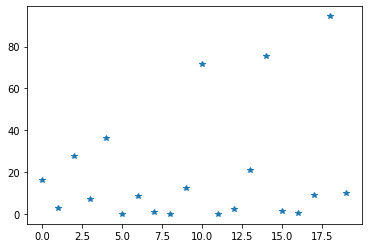

In [39]:
plt.plot(DFAnalysis['Error'],'*')
plt.show()

In [40]:
# RMSE = np.sqrt(np.sum(DFAnalysis['Error']))
# print(RMSE)
MSE = mean_squared_error(Ytest,Ypred)
print(MSE) #MSE
RMSE = mean_squared_error(Ytest,Ypred,squared=False)
print(RMSE) # RMSE

19.889188887437605
4.4597296877095145
